In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score, precision_score, recall_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'ticks', font_scale = 1.8)
from sklearn.metrics import confusion_matrix, accuracy_score,\
precision_score, recall_score
from sklearn import tree, svm, ensemble
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from IPython.display import Image
import pydotplus 

In [137]:
diag = pd.read_csv('Breast-Cancer-Wisconsin.csv')
diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concavepoints_mean         569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concavepoints_se           569 non-null float64
symmetry_se                569 

In [138]:
bree = smf.glm(formula = 'diagnosis_binary~perimeter_worst+texture_worst+smoothness_mean', data = diag, family = sm.families.Binomial()).fit()
print bree.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:       diagnosis_binary   No. Observations:                  569
Model:                            GLM   Df Residuals:                      565
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -53.829
Date:                Fri, 23 Jun 2017   Deviance:                       107.66
Time:                        14:46:35   Pearson chi2:                     640.
No. Iterations:                     9                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -46.2247      5.849     -7.903      0.000     -57.688     -34.761
perimeter_worst     0.2325      0.031

In [139]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(diag['diagnosis_binary'], bree.predict()>0.5, labels = [1, 0])

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print '\nMetrics'
print 'Accuracy: %.3f' %accuracy_score(diag['diagnosis_binary'], bree.predict()>0.5)
print 'Precision: %.3f' %precision_score(diag['diagnosis_binary'], bree.predict()>0.5)
print 'Recall: %.3f' %recall_score(diag['diagnosis_binary'],bree.predict()>0.5)


Metrics
Accuracy: 0.967
Precision: 0.962
Recall: 0.948


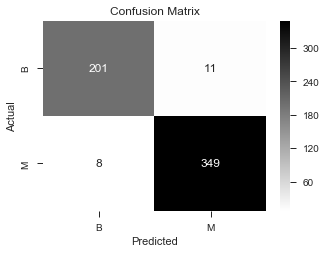

In [141]:
df_cm = pd.DataFrame(conf_mat, index = ['B', 'M'], columns = ['B', 'M'])
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap = 'binary')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [209]:
def forward_selector_glm(data, response, threshold = 0.07):
    """Generalised linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels generalised linear model
           with an intercept
           selected by forward selection
           evaluated by deviance
           
    Modified from: http://planspace.org/20150423-forward_selection_with_statsmodels/ #af
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 10000.0, 10000.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        

        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.glm(formula, data, family = sm.families.Binomial()).fit().deviance
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse = True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if (best_new_score + best_new_score*threshold) < current_score : #  Thresholding
            print best_candidate, '\t' , best_new_score
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.glm(formula, data, family = sm.families.Binomial()).fit()
    return model



In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
train, test = train_test_split(diag, test_size = 0.2,random_state = 42)

In [225]:
training = forward_selector_glm(train,'diagnosis_binary')


perimeter_worst 	184.281171156
smoothness_worst 	126.070746258
texture_worst 	91.4060498141
area_se 	77.2430986292
symmetry_worst 	66.6492405928


In [226]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(train['diagnosis_binary'], training.predict()>0.5, labels = [1, 0])

In [227]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print '\nMetrics'
print 'Accuracy: %.3f' %accuracy_score(train['diagnosis_binary'], training.predict()>0.5)
print 'Precision: %.3f' %precision_score(train['diagnosis_binary'], training.predict()>0.5)
print 'Recall: %.3f' %recall_score(train['diagnosis_binary'],training.predict()>0.5)


Metrics
Accuracy: 0.974
Precision: 0.970
Recall: 0.959


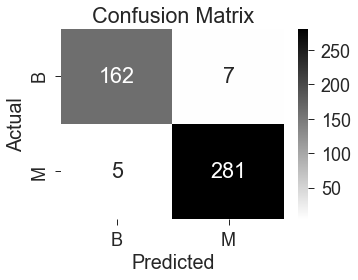

In [228]:
df_cm = pd.DataFrame(conf_mat, index = ['B', 'M'], columns = ['B', 'M'])
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap = 'binary')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [239]:
other_var = ['perimeter_worst','smoothness_worst','texture_worst','area_se','symmetry_worst']
x_train = np.array(train[other_var]) 
y_train = np.array(train['diagnosis_binary']) 
x_test = np.array(test[other_var]) 
y_test  = np.array(test['diagnosis_binary'])

In [240]:
from sklearn import tree 
cancertree = tree.DecisionTreeClassifier(max_depth=2, min_impurity_split=0.2)
scores = cross_val_score(cancertree, x_train, y_train, cv=10, scoring='accuracy') 
print 'Mean accuracy from the cross-validation: %.3f \nand the full vector: %s\n' %(np.mean(scores), ', '.join(map("{:.3f}".format, scores)))
cancertree.fit(x_train,y_train) 

Mean accuracy from the cross-validation: 0.894 
and the full vector: 0.957, 0.870, 0.913, 0.826, 0.957, 0.935, 0.889, 0.867, 0.889, 0.841



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_impurity_split=0.2,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')